
<div style="background-color:#000047; padding: 30px; border-radius: 10px; color: white; text-align: center;">
    <img src='Figures/alinco.png' style="height: 100px; margin-bottom: 10px;"/>
    <h1>Distribución de Datos</h1>
</div>


La **distribución de datos** describe cómo se dispersan o agrupan los valores de una variable dentro de un conjunto de datos. Indica la frecuencia con la que aparecen ciertos valores, su tendencia central (media, mediana, moda), su dispersión (varianza, desviación estándar), y la presencia de valores atípicos.

El análisis de las distribuciones de los conjuntos de datos nos sirve para:

- Seleccionar modelos adecuados: Algunos algoritmos de IA asumen ciertas distribuciones (por ejemplo, normalidad).
- Detectar sesgos y anomalías: Permite identificar valores atípicos o datos desbalanceados que pueden afectar el rendimiento del modelo.
- Mejorar la preparación de datos: Ayuda a decidir si es necesario transformar, normalizar o balancear los datos.
- Interpretar resultados: Facilita la comprensión de los patrones y relaciones en los datos, lo que mejora la interpretación de los resultados del modelo.

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
LW=load_wine()
data=LW.data
names=LW.feature_names
df=pd.DataFrame(data=data,columns=names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# Distribución

In [ ]:
#'total phenols'
#df.loc[:,'total phenols']

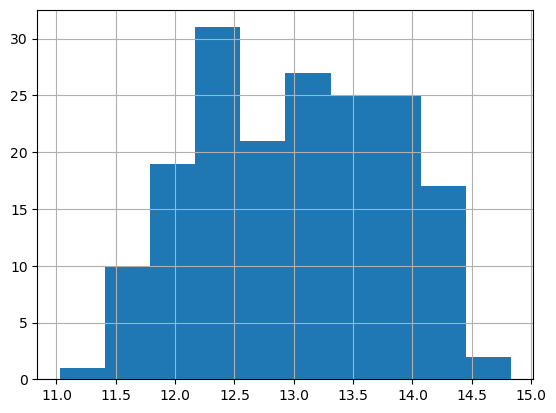

In [4]:
x=df.alcohol # objeto de tipo series
h=x.hist(bins=10)

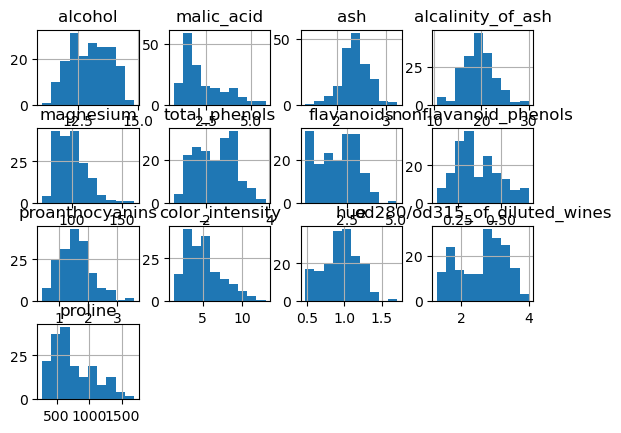

In [5]:
df.hist();

In [6]:
type(x)

pandas.core.series.Series

In [7]:
x

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64

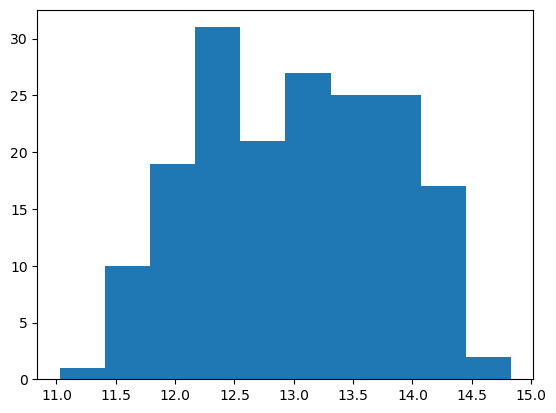

In [8]:
plt.hist(x);

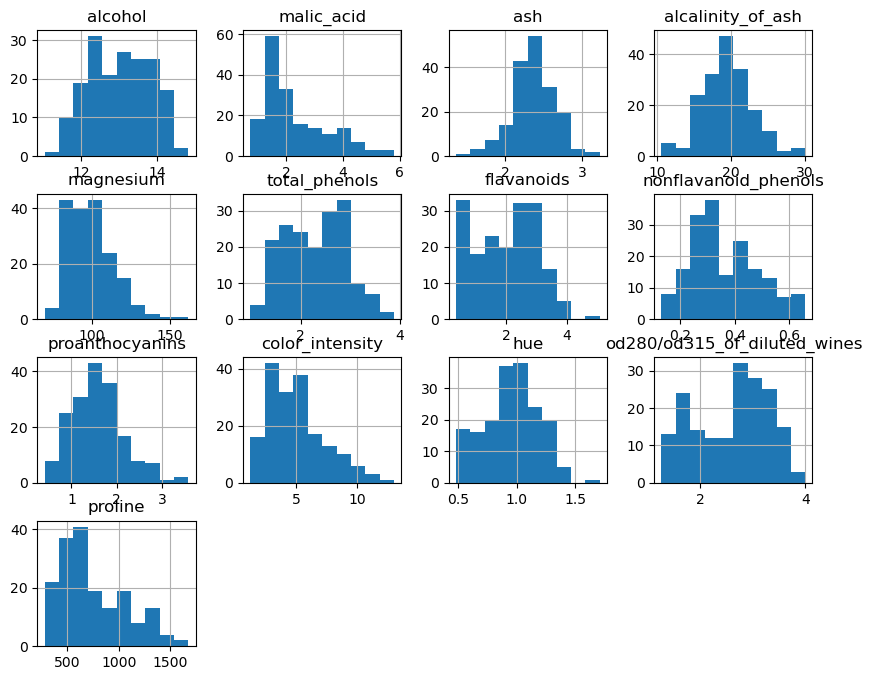

In [9]:
h=df.hist(figsize=(10,8))

# Medidas de posición o de tendencia central

### Media aritmética

La **media** es el promedio aritmético de un conjunto de datos.

$$ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i $$

Donde $x_i$ son los valores y $n$ es el número total de datos.

In [10]:
# Ejemplo de cálculo de la media en Python
datos = [10, 12, 15, 18, 20] # conjunto de datos
media = np.mean(datos)       # cálculo de la media con python
print('Media:', media) 

Media: 15.0


In [11]:
# Considerando la característica "alcohol" del dataframe df
x.mean()

13.00061797752809

In [12]:
#Esto es equivalente a utilizar el método de la librería de numpy
np.mean(x)

13.00061797752809

In [13]:
# Obtención de la media de todas las características en el dataset
s_mean = df.mean()
s_mean

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64

In [14]:
#Media de la carcaterística flavanoids
s_mean['flavanoids'] 

2.0292696629213474

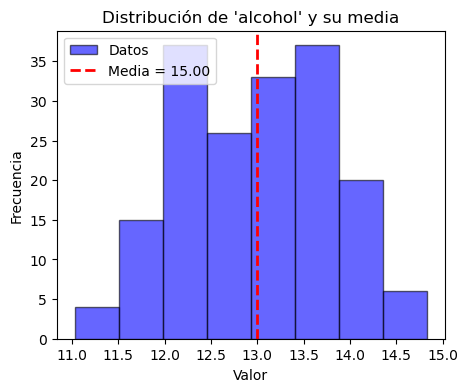

In [15]:
plt.figure(figsize=(5, 4))
plt.hist(x, bins=8, alpha=0.6, color='blue', edgecolor='black', label='Datos')
plt.axvline(x.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Media = {media:.2f}')
plt.title('Distribución de \'alcohol\' y su media')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


### Media Recortada

La **media recortada** es una medida de tendencia central que se calcula eliminando un porcentaje igual de los valores más bajos y más altos de un conjunto de datos antes de calcular la media. Esto reduce el efecto de los valores atípicos (outliers) en el promedio.

La media recortada del $p\%$ se calcula eliminando el $p\%$ de los datos más pequeños y el $p\%$ de los datos más grandes, y luego calculando la media de los datos restantes.

Sea el conjunto de datos definido como sigue: $X=\{x_1 \leq x_2 \leq ... \leq x_n\}$

Si consideramos un $p$ porcentaje que se desea recortar y a $n$ como el número de elementos totales del conjunto de datos.

Entonces:

$$r = floor(n*p/100)$$ 

$$X_{t} = \{x_{1+r},..,x_{n-r}\}$$

Fórmula:

$$ \bar{x}_{recortada} = \frac{1}{n-2r} \sum_{i=r+1}^{n-r} x_{i} $$

donde $r$ es el número de valores eliminados en cada extremo y $x_{i}$ son los datos ordenados.

In [16]:
def media_recortada(datos, porcentaje_recorte): #agregar a la librería
    media_recortada = None
    n = len(datos)
    r = int(n * porcentaje_recorte)
    datos_ordenados = sorted(datos)
    datos_recortados = datos_ordenados[r:n-r] if n - 2*r > 0 else []
    if datos_recortados:
        media_recortada = sum(datos_recortados) / len(datos_recortados)
        print(f'Media recortada ({porcentaje_recorte*100}%): {media_recortada}', )
    else:
        print('No hay suficientes datos para calcular la media recortada con este porcentaje.')
    return media_recortada

In [17]:
x

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64

In [18]:
media_recortada(x, 0.1)

Media recortada (10.0%): 13.006388888888889


13.006388888888889

In [19]:
stats.tmean?

Signature:
stats.tmean(
    a,
    limits=None,
    inclusive=(True, True),
    axis=None,
    *,
    nan_policy='propagate',
    keepdims=False,
)
Docstring:
Compute the trimmed mean.

This function finds the arithmetic mean of given values, ignoring values
outside the given `limits`.

Parameters
----------
a : array_like
    Array of values.
limits : None or (lower limit, upper limit), optional
    Values in the input array less than the lower limit or greater than the
    upper limit will be ignored.  When limits is None (default), then all
    values are used.  Either of the limit values in the tuple can also be
    None representing a half-open interval.
inclusive : (bool, bool), optional
    A tuple consisting of the (lower flag, upper flag).  These flags
    determine whether values exactly equal to the lower or upper limits
    are included.  The default value is (True, True).
axis : int or None, default: None
    If an int, the axis of the input along which to compute the stat

In [20]:
stats.tmean(x,(12,14)) # Conociendo el limite inferior y superior

12.983576642335766

In [21]:
stats.trim_mean?

Signature: stats.trim_mean(a, proportiontocut, axis=0)
Docstring:
Return mean of array after trimming a specified fraction of extreme values

Removes the specified proportion of elements from *each* end of the
sorted array, then computes the mean of the remaining elements.

Parameters
----------
a : array_like
    Input array.
proportiontocut : float
    Fraction of the most positive and most negative elements to remove.
    When the specified proportion does not result in an integer number of
    elements, the number of elements to trim is rounded down.
axis : int or None, default: 0
    Axis along which the trimmed means are computed.
    If None, compute over the raveled array.

Returns
-------
trim_mean : ndarray
    Mean of trimmed array.

See Also
--------
trimboth : Remove a proportion of elements from each end of an array.
tmean : Compute the mean after trimming values outside specified limits.

Notes
-----
For 1-D array `a`, `trim_mean` is approximately equivalent to the follo

In [22]:
stats.trim_mean(x,0.1)

13.006388888888889

In [23]:
x2 = np.array([1.3,1.5,2.0,4.7,8.9,10,11.5])
x2

array([ 1.3,  1.5,  2. ,  4.7,  8.9, 10. , 11.5])

In [24]:
# p 5% de los datos
stats.trim_mean(x2,0.05), x2.mean()

(5.7, 5.7)

In [25]:
# p 15%
stats.trim_mean(x2,0.15), x2.mean()

(5.42, 5.7)

La media recortada puede ayudarnos a:
- Reducir el efecto de los valores atípicos (outliers) en el cálculo de la media.
- Proporcionar una medida de tendencia central más robusta en distribuciones sesgadas o con extremos.

Sin embargo:
- Se puede perder información al eliminar datos, lo que puede ser problemático si el conjunto de datos es pequeño.
- El porcentaje de recorte debe elegirse cuidadosamente; un valor inadecuado puede distorsionar los resultados.


### Media ponderada

Toma en cuenta la importancia o peso de cada valor en el conjunto de datos. Es útil cuando algunos datos tienen mayor relevancia que otros.


$$ \bar{x}_p = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i} $$

Donde:
- $x_i$ son los valores de los datos.
- $w_i$ son los pesos asignados a cada valor.
- $n$ es el número total de datos.

Considere las siguientes calificaciones y pesos de la materia:

- Examen 1: 80 (peso 20%)
- Examen 2: 90 (peso 30%)
- Proyecto: 95 (peso 50%)

La media ponderada sería:

$$ \bar{x}_p = \frac{80 \times 0.2 + 90 \times 0.3 + 95 \times 0.5}{0.2 + 0.3 + 0.5} = 91.5 $$

In [26]:
np.average?

Signature:      
np.average(
    a,
    axis=None,
    weights=None,
    returned=False,
    *,
    keepdims=<no value>,
)
Call signature:  np.average(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function average at 0x000001E916A563E0>
File:            c:\programdata\anaconda3\lib\site-packages\numpy\lib\function_base.py
Docstring:      
Compute the weighted average along the specified axis.

Parameters
----------
a : array_like
    Array containing data to be averaged. If `a` is not an array, a
    conversion is attempted.
axis : None or int or tuple of ints, optional
    Axis or axes along which to average `a`.  The default,
    axis=None, will average over all of the elements of the input array.
    If axis is negative it counts from the last to the first axis.

    .. versionadded:: 1.7.0

    If axis is a tuple of ints, averaging is performed on all of the axes
    specified in the tuple instead of a single axis or all the axes as
    before.
weight

In [27]:
x

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64

In [28]:
np.average(x)

13.00061797752809

In [29]:
x.shape

(178,)

In [30]:
w=np.ones(x.shape) # [1,1,1,...,1]
w[0]=2              # A la primera observación le estamos dando el doble de importancia

In [31]:
x[0]

14.23

In [32]:
np.average(x,weights=w) # Media ponderada

13.007486033519553

La media ponderada:
- Permite dar mayor importancia a ciertos valores según su relevancia.
- Es útil en situaciones donde los datos no tienen la misma representatividad.
- Refleja mejor la realidad en contextos como calificaciones, encuestas o promedios ponderados.

Sin embargo: 
- Requiere conocer los pesos adecuados para cada valor.
- Si los pesos no están bien definidos, el resultado puede ser engañoso.
- Puede ser más compleja de calcular y entender que la media simple.

### Media geométrica

Se utiliza principalmente para datos positivos y multiplicativos, como tasas de crecimiento, rendimientos financieros o proporciones.

$$ \bar{x}_g = \sqrt[n]{x_1 \cdot x_2 \cdot \ldots \cdot x_n} $$

Donde:
- $x_1, x_2, \ldots, x_n$ son los valores del conjunto de datos.
- $n$ es el número total de valores.

Es especialmente útil cuando los datos representan factores de cambio relativos (por ejemplo, tasas de crecimiento anual). A diferencia de la media aritmética, la media geométrica minimiza el impacto de valores extremos altos y es más apropiada para promediar razones o porcentajes.

Supongamos que una inversión crece los siguientes años a tasas del 10%, 20% y 30%. Para calcular la tasa promedio de crecimiento:

- Convertimos los porcentajes a factores: 1.10, 1.20, 1.30
- Aplicamos la fórmula:

$$ \bar{x}_g = \sqrt[3]{1.10 \times 1.20 \times 1.30} \approx 1.196 $$

La tasa promedio de crecimiento es aproximadamente 19.6%.

In [33]:
tasas = [1.10, 1.20, 1.30]
media_geom = stats.gmean(tasas)
print('Media geométrica de las tasas de crecimiento:', media_geom, 'ó', (media_geom-1)*100, '%')

Media geométrica de las tasas de crecimiento: 1.197215767258376 ó 19.721576725837608 %


In [34]:
stats.gmean?

Signature:
stats.gmean(
    a,
    axis=0,
    dtype=None,
    weights=None,
    *,
    nan_policy='propagate',
    keepdims=False,
)
Docstring:
Compute the weighted geometric mean along the specified axis.

The weighted geometric mean of the array :math:`a_i` associated to weights
:math:`w_i` is:

.. math::

    \exp \left( \frac{ \sum_{i=1}^n w_i \ln a_i }{ \sum_{i=1}^n w_i }
               \right) \, ,

and, with equal weights, it gives:

.. math::

    \sqrt[n]{ \prod_{i=1}^n a_i } \, .

Parameters
----------
a : array_like
    Input array or object that can be converted to an array.
axis : int or None, default: 0
    If an int, the axis of the input along which to compute the statistic.
    The statistic of each axis-slice (e.g. row) of the input will appear in a
    corresponding element of the output.
    If ``None``, the input will be raveled before computing the statistic.
dtype : dtype, optional
    Type to which the input arrays are cast before the calculation is
    perform

In [35]:
#Media geométrica
stats.gmean(x)

12.975278352602606

La media geométrica:
- Es adecuada para promediar tasas de crecimiento, razones y porcentajes.
- Reduce el impacto de valores extremos altos.
- Refleja mejor el comportamiento multiplicativo de los datos.

Sin embargo:
- Solo se puede aplicar a datos positivos.
- No es adecuada para datos con valores negativos o nulos.

### Media armónica  

Se utiliza principalmente cuando los datos son tasas o razones, como velocidades o precios unitarios.

$$ \bar{x}_a = \frac{n}{\sum_{i=1}^{n} \frac{1}{x_i}} $$

Donde:
- $x_i$ son los valores del conjunto de datos.
- $n$ es el número total de valores.

Es especialmente útil cuando se desea promediar magnitudes que se expresan como "por unidad" (por ejemplo, velocidad promedio en trayectos de igual distancia, o costo promedio por unidad).

A diferencia de la media aritmética y la geométrica, la media armónica da más peso a los valores pequeños.


Supongamos que un automóvil recorre una distancia a $60 km/h$ y regresa a $40 km/h$. ¿Cuál es la velocidad promedio?

el cálculo de la media armónica sería:

$$ \bar{x}_a = \frac{2}{\frac{1}{60} + \frac{1}{40}} = 48 \text{ km/h} $$

In [36]:
stats.hmean?

Signature:
stats.hmean(
    a,
    axis=0,
    dtype=None,
    *,
    weights=None,
    nan_policy='propagate',
    keepdims=False,
)
Docstring:
Calculate the weighted harmonic mean along the specified axis.

The weighted harmonic mean of the array :math:`a_i` associated to weights
:math:`w_i` is:

.. math::

    \frac{ \sum_{i=1}^n w_i }{ \sum_{i=1}^n \frac{w_i}{a_i} } \, ,

and, with equal weights, it gives:

.. math::

    \frac{ n }{ \sum_{i=1}^n \frac{1}{a_i} } \, .

Parameters
----------
a : array_like
    Input array, masked array or object that can be converted to an array.
axis : int or None, default: 0
    If an int, the axis of the input along which to compute the statistic.
    The statistic of each axis-slice (e.g. row) of the input will appear in a
    corresponding element of the output.
    If ``None``, the input will be raveled before computing the statistic.
dtype : dtype, optional
    Type of the returned array and of the accumulator in which the
    elements are sum

In [37]:
velocidades = [60, 40]
media_armonica = stats.hmean(velocidades)
print('Media armónica de las velocidades:', media_armonica, 'km/h')

Media armónica de las velocidades: 47.99999999999999 km/h


In [38]:
#@title Media armónica   
stats.hmean(x)

12.949820740397147

La media armónica:
- Es adecuada para promediar tasas o razones.
- Da más peso a los valores pequeños, lo que puede ser útil en ciertos contextos.
- Útil cuando los datos representan magnitudes "por unidad".

Sin embargo:
- Solo se puede aplicar a datos positivos y distintos de cero.
- Es muy sensible a valores cercanos a cero.
- Puede no ser intuitiva 

### Moda

La moda es una medida de tendencia central que representa el valor que aparece con mayor frecuencia en un conjunto de datos.
La moda es útil para describir conjuntos de datos donde un valor ocurre con mucha frecuencia. Puede haber más de una moda (bimodal, multimodal) o ninguna si todos los valores son únicos.

In [39]:
datos_ejemplo = [2, 4, 4, 6, 8, 4, 6, 8, 8, 8]
moda = stats.mode(datos_ejemplo, keepdims=True)
print('Moda:', moda.mode[0], 'Frecuencia:', moda.count[0])

Moda: 8 Frecuencia: 4


In [40]:
x.mode()

0    12.37
1    13.05
Name: alcohol, dtype: float64

In [42]:
mo=stats.mode(x)
mo

ModeResult(mode=12.37, count=6)

In [43]:
mo[0]

12.37

In [44]:
mo[1]

6

### Mediana

La mediana representa el valor central de un conjunto de datos ordenados. Es especialmente útil cuando los datos contienen valores atípicos o están sesgados.

- Si el número de datos ($n$) es impar:

$$ \text{Mediana} = x_{\frac{n+1}{2}} $$

- Si el número de datos ($n$) es par:

$$ \text{Mediana} = \frac{x_{\frac{n}{2}} + x_{\frac{n}{2}+1}}{2} $$

Donde $x_i$ representa los datos ordenados de menor a mayor.

La mediana divide el conjunto de datos en dos partes iguales: el 50% de los valores son menores o iguales a la mediana y el otro 50% son mayores o iguales. Es menos sensible a valores extremos que la media.


In [45]:
datos1 = [3, 7, 9, 15, 21]
datos2 = [4, 8, 15, 16]
print('Mediana (impar):', np.median(datos1))
print('Mediana (par):', np.median(datos2))

Mediana (impar): 9.0
Mediana (par): 11.5


In [46]:
x.median()

13.05

In [47]:
np.median(x)

13.05

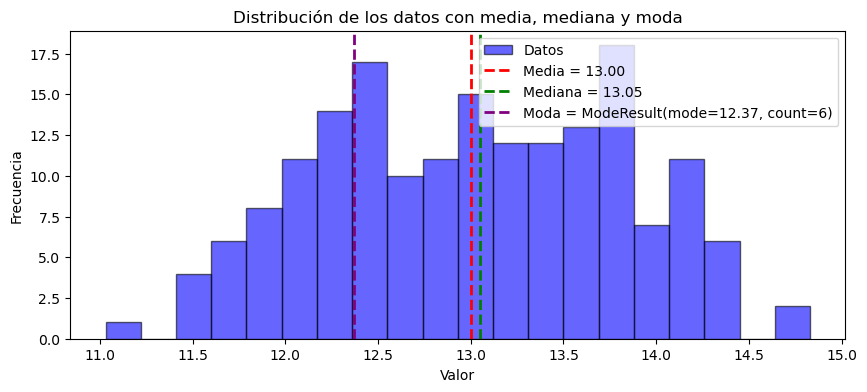

In [48]:
plt.figure(figsize=(10, 4))
plt.hist(x, bins=20, alpha=0.6, color='blue', edgecolor='black', label='Datos')
plt.axvline(x.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Media = {x.mean():.2f}')
plt.axvline(x.median(), color='green', linestyle='dashed', linewidth=2, label=f'Mediana = {x.median():.2f}')
plt.axvline(stats.mode(x)[0], color='purple', linestyle='dashed', linewidth=2, label=f'Moda = {stats.mode(x)}')
plt.title('Distribución de los datos con media, mediana y moda')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### Cuantiles o percentiles

- **Cuartiles:** Dividen los datos en 4 partes iguales.
- **Deciles:** Dividen los datos en 10 partes iguales.
- **Percentiles:** Dividen los datos en 100 partes iguales.

#### Cuartiles

Dada una muestra $x_1,x_2,...,x_n$, podemos ordenar los datos de menor a mayor y dividirlos en cuatro partes con la misma cantidad de datos. Los cortes de estas divisiones son lo que llamamos cuartiles. Para dividir un conjunto de datos en cuatro partes, necesitamos tres cuartiles, identificados como $Q_1$, $Q_2$ y $Q_3$.

Junto con el mínimo y el máximo, estos 5 valores sirven para resumir la distribución de una variable, con menos detalle que un histograma pero con más información que usando sólo la media y la varianza.

In [49]:
x.quantile(0.25) # Primer cuartíl

12.362499999999999

In [50]:
x.quantile(0.1) # Primer decíl

11.933

In [51]:
np.quantile(x,0.25)

12.362499999999999

In [52]:
np.quantile(x,[0.25,0.5,0.75]) # Primero, segundo y tercer cuartíl

array([12.3625, 13.05  , 13.6775])

In [53]:
x.quantile([0.25,0.5,0.75])

0.25    12.3625
0.50    13.0500
0.75    13.6775
Name: alcohol, dtype: float64

In [ ]:
df.describe()

El segundo cuartil es igual a la Mediana, un estadístico que también se puede considerar una medida de tendencia central. 

In [54]:
x.quantile(0.5), x.median()

(13.05, 13.05)

In [55]:
np.percentile(x,25) # Primer cuartíl

12.362499999999999

In [56]:
q1 = np.percentile(x, 25)
q2 = np.percentile(x, 50)  # Mediana
q3 = np.percentile(x, 75)
percentil_90 = np.percentile(x, 90)
decil_3 = np.percentile(x, 30)
print('Q1 (25%):', q1)
print('Q2 (Mediana, 50%):', q2)
print('Q3 (75%):', q3)
print('Percentil 90:', percentil_90)
print('Decil 3 (30%):', decil_3)

Q1 (25%): 12.362499999999999
Q2 (Mediana, 50%): 13.05
Q3 (75%): 13.6775
Percentil 90: 14.1
Decil 3 (30%): 12.421


##### Rango intercuartílico

La diferencia entre el $Q_3$ y $Q_1$ es lo que llamamos Rango intercuartílico y lo representamos con $IQR$ por Inter-quartile range. Es una medida de dispersión de los datos, ya que representa el ancho del 50% central de los datos. Mientras más dispersos estén los datos, mayor será esta distancia.

$$IQR=Q_3−Q_1$$

In [57]:
stats.iqr(x,rng=(0,100))

3.8000000000000007

In [58]:
#title Rango intercuartílico
stats.iqr(x)

1.3150000000000013

In [59]:
q1,q3=np.quantile(x,(0.25,0.75))
q1,q3

(12.362499999999999, 13.6775)

In [60]:
q3-q1

1.3150000000000013

In [61]:
q1,q3=x.quantile([0.25,0.75])

In [62]:
q1,q3

(12.362499999999999, 13.6775)

##### Representación gráfica

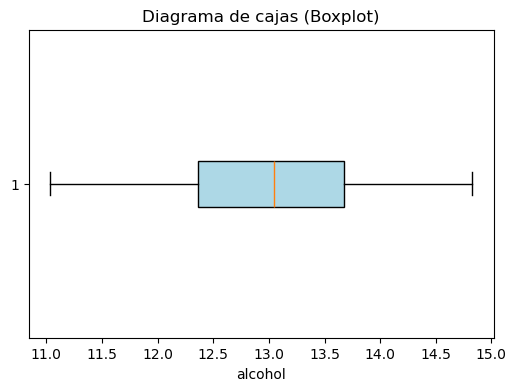

In [63]:
plt.figure(figsize=(6, 4))
plt.boxplot(x, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Diagrama de cajas (Boxplot)')
plt.xlabel('alcohol')
plt.show()

1. En este caso la característica está representada en el eje x.
2. La línea vertical del medio de la caja, en "amarillo", es la mediana
3. La línea vertical izquierda de la caja es el 1er cuartil, y la línea vertical de la derecha es el 3er cuartil.
5. El ancho de la caja es el Rango intercuartílico $IQR$. Por lo tanto, mientras mayor sea la dispersión, más grande será la caja.
6. Los extremos de las líneas verticales, son llamados Bigotes son el mínimo y el máximo. Cuando hay valores atípicos, son los valores más bajos y altos que no sean valores atípicos.
7. Los valores atípicos se definen en este contexto como valores más altos que $Q_3+(1.5∗IQR)$
 o más bajos que $Q_1−(1.5∗IQR)$. Estos valores se representan con puntos.

# Medidas de disperción

### Varianza y desviación estandar

La **varianza** y la **desviación estándar** son medidas de dispersión que indican cuánto se alejan los datos respecto a la media.

$$ \sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 $$

Para una muestra, la fórmula es:

$$ s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2 $$

Donde:
- $x_i$ son los valores de los datos.
- $\bar{x}$ es la media.
- $n$ es el número de datos.

In [64]:
x = np.array([10, 12, 15, 18, 20])
varianza_poblacional = x.var(ddof=0)
varianza_muestral = x.var(ddof=1)
desv_std_poblacional = x.std(ddof=0)
desv_std_muestral = x.std(ddof=1)
print('Varianza poblacional:', varianza_poblacional)
print('Varianza muestral:', varianza_muestral)
print('Desviación estándar poblacional:', desv_std_poblacional)
print('Desviación estándar muestral:', desv_std_muestral)

Varianza poblacional: 13.6
Varianza muestral: 17.0
Desviación estándar poblacional: 3.687817782917155
Desviación estándar muestral: 4.123105625617661


- `x.std(ddof=0)`: Calcula la desviación estándar considerando que los datos corresponden a toda la población. El divisor es $n$.
- `x.std(ddof=1)`: Calcula la desviación estándar muestral, es decir, cuando los datos son una muestra de una población más grande. El divisor es $n-1$ (corrección de Bessel).

La corrección de Bessel (`ddof=1`) ajusta el sesgo en la estimación de la varianza y desviación estándar cuando se trabaja con muestras.

In [65]:
df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


In [66]:
x.var() # Varianza muestral

13.6

In [67]:
x.std() # Desviación estandar muestral

3.687817782917155

In [68]:
df.std()

alcohol                           0.811827
malic_acid                        1.117146
ash                               0.274344
alcalinity_of_ash                 3.339564
magnesium                        14.282484
total_phenols                     0.625851
flavanoids                        0.998859
nonflavanoid_phenols              0.124453
proanthocyanins                   0.572359
color_intensity                   2.318286
hue                               0.228572
od280/od315_of_diluted_wines      0.709990
proline                         314.907474
dtype: float64

In [69]:
np.var(x) # Varianza del conjunto completo

13.6

In [70]:
np.std(x) # Std del conjunto completo

3.687817782917155

In [71]:
x.var(ddof=0) # Varianza del conjunto completo

13.6

In [72]:
x.std(ddof=0) # Std del conjunto completo

3.687817782917155

### Recorrido max-min

Es una medida de dispersión que se calcula como la diferencia entre el valor máximo y el valor mínimo de un conjunto de datos.

$$ R = x_{\text{max}} - x_{\text{min}} $$

Donde:
- $x_{\text{max}}$ es el valor máximo del conjunto de datos.
- $x_{\text{min}}$ es el valor mínimo del conjunto de datos.


In [73]:
# Rango
x.max()-x.min() # Desde Pandas

10

In [74]:
np.max(x)-np.min(x) # Desde Numpy

10

In [75]:
max(x)-min(x) # 

10

In [76]:
np.ptp(x)

10

In [77]:
df.max()-df.min()

alcohol                            3.80
malic_acid                         5.06
ash                                1.87
alcalinity_of_ash                 19.40
magnesium                         92.00
total_phenols                      2.90
flavanoids                         4.74
nonflavanoid_phenols               0.53
proanthocyanins                    3.17
color_intensity                   11.72
hue                                1.23
od280/od315_of_diluted_wines       2.73
proline                         1402.00
dtype: float64

In [78]:
np.max(df,axis=0)-np.min(df,axis=0)

alcohol                            3.80
malic_acid                         5.06
ash                                1.87
alcalinity_of_ash                 19.40
magnesium                         92.00
total_phenols                      2.90
flavanoids                         4.74
nonflavanoid_phenols               0.53
proanthocyanins                    3.17
color_intensity                   11.72
hue                                1.23
od280/od315_of_diluted_wines       2.73
proline                         1402.00
dtype: float64

El recorrido max-min:

- Es muy fácil y rápido de calcular.
- Permite obtener una idea rápida de la dispersión total de los datos.
- Es útil para comparar la variabilidad entre diferentes conjuntos de datos.
- No requiere cálculos complejos ni fórmulas avanzadas.

### Coeficiente de variación de Pearson

Es una medida relativa de dispersión que indica el grado de variabilidad de los datos respecto a su media. Se expresa como un porcentaje y permite comparar la dispersión entre diferentes conjuntos de datos, incluso si tienen unidades o medias distintas.

$$ CV = \frac{\sigma}{\bar{x}} \times 100 $$

Donde:
- $\sigma$ es la desviación estándar.
- $\bar{x}$ es la media.


- Un CV bajo indica que los datos están poco dispersos respecto a la media.
- Un CV alto indica mayor dispersión relativa.

Supongamos que tenemos dos conjuntos de datos con:

- A: media = 50, desviación estándar = 5 → CV = (5/50)*100 = 10%
- B: media = 100, desviación estándar = 20 → CV = (20/100)*100 = 20%

Podemos concluir que el conjunto B es relativamente más disperso que el conjunto A.

In [79]:
# Coeficiente de variación de Pearson
stats.variation(x)

0.24585451886114368

In [80]:
stats.variation(df)

array([0.06226957, 0.47681402, 0.11560124, 0.17082223, 0.14279209,
       0.27192157, 0.4908411 , 0.34296507, 0.35875872, 0.45704302,
       0.23805811, 0.27108673, 0.42043713])

In [81]:
df.std(ddof=0)

alcohol                           0.809543
malic_acid                        1.114004
ash                               0.273572
alcalinity_of_ash                 3.330170
magnesium                        14.242308
total_phenols                     0.624091
flavanoids                        0.996049
nonflavanoid_phenols              0.124103
proanthocyanins                   0.570749
color_intensity                   2.311765
hue                               0.227929
od280/od315_of_diluted_wines      0.707993
proline                         314.021657
dtype: float64

In [82]:
x.std(ddof=0)/np.abs(x.mean())

0.24585451886114368

# Medidas de forma

Las **medidas de forma** describen la forma de la distribución de los datos, permitiendo identificar si los datos están sesgados (asimetría) o si presentan colas y picos más o menos pronunciados que una distribución normal (curtosis).


#### Asimetría (skewness)

Formalmente, decimos que una distribución de frecuencias es simétrica si la media aritmética $\bar{X}$ es igual a la mediana $X_M$. Esto significa que en cualquier otro caso, la distribución es asimétrica.

**Tercer momento central**

El $k$-ésimo momento central de una variable aleatoria $X$ es:

$$ \mu_k = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^k $$

Para $k=3$ (tercer momento central):

$$ \mu_3 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^3 $$

La asimetría se define como:

$$ \text{Asimetría} = \gamma_1 = \frac{\mu_3}{\sigma^3} $$

Donde:
- $\mu_3$ es el tercer momento central.
- $\sigma$ es la desviación estándar.

Esta fórmula permite cuantificar la asimetría de una distribución en función de sus momentos centrales.
> Si $\text{Asimetría}=0$, la distribución es simétrica.

> Si $\text{Asimetría}>0$, la cola derecha es más larga (asimetría a la derecha).

> Si $\text{Asimetría}<0$, la cola izquierda es más larga (asimetría a la izquierda).

In [83]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

#Datos Simétricos
datos_simetricos = np.random.normal(loc=0, scale=1, size=1000)
media_sim = np.mean(datos_simetricos)
mediana_sim = np.median(datos_simetricos)

#datos asimétricos positivos (distribución exponencial)
datos_asim_pos = np.random.exponential(scale=1, size=1000)
media_pos = np.mean(datos_asim_pos)
mediana_pos = np.median(datos_asim_pos)

# Datos asimétricos negativos (simulación: invertir exponencial)
datos_asim_neg = -np.random.exponential(scale=1, size=1000)
media_neg = np.mean(datos_asim_neg)
mediana_neg = np.median(datos_asim_neg)

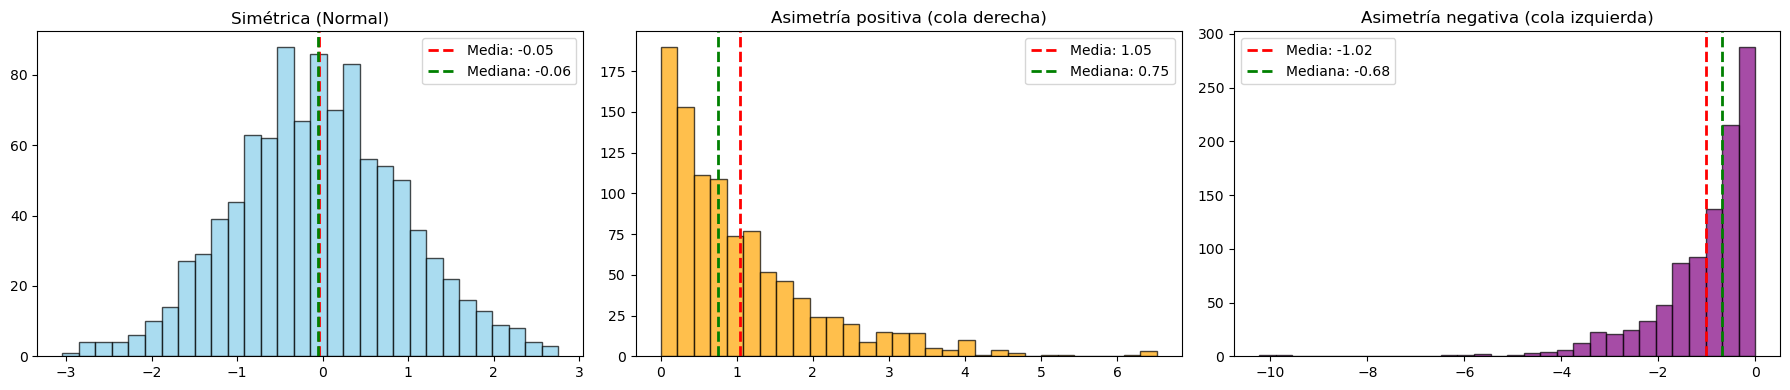

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
# Gráfica simétrica
axs[0].hist(datos_simetricos, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axs[0].axvline(media_sim, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_sim:.2f}')
axs[0].axvline(mediana_sim, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana_sim:.2f}')
axs[0].set_title('Simétrica (Normal)')
axs[0].legend()

# Gráfica asimetría positiva
axs[1].hist(datos_asim_pos, bins=30, color='orange', edgecolor='black', alpha=0.7)
axs[1].axvline(media_pos, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_pos:.2f}')
axs[1].axvline(mediana_pos, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana_pos:.2f}')
axs[1].set_title('Asimetría positiva (cola derecha)')
axs[1].legend()

# Gráfica asimetría negativa
axs[2].hist(datos_asim_neg, bins=30, color='purple', edgecolor='black', alpha=0.7)
axs[2].axvline(media_neg, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_neg:.2f}')
axs[2].axvline(mediana_neg, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana_neg:.2f}')
axs[2].set_title('Asimetría negativa (cola izquierda)')
axs[2].legend()

plt.tight_layout()
plt.show()

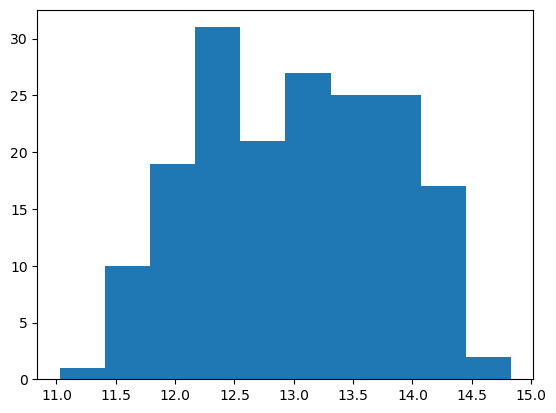

In [85]:
#Graficamos la distribución de nuestros datos
plt.hist(df['alcohol']);

In [86]:
# (Simetría/Sesgo) de la caracterísitca 'alcohol'
df['alcohol'].skew()

-0.051482331077134784

In [87]:
df.skew()

alcohol                        -0.051482
malic_acid                      1.039651
ash                            -0.176699
alcalinity_of_ash               0.213047
magnesium                       1.098191
total_phenols                   0.086639
flavanoids                      0.025344
nonflavanoid_phenols            0.450151
proanthocyanins                 0.517137
color_intensity                 0.868585
hue                             0.021091
od280/od315_of_diluted_wines   -0.307285
proline                         0.767822
dtype: float64

<Axes: >

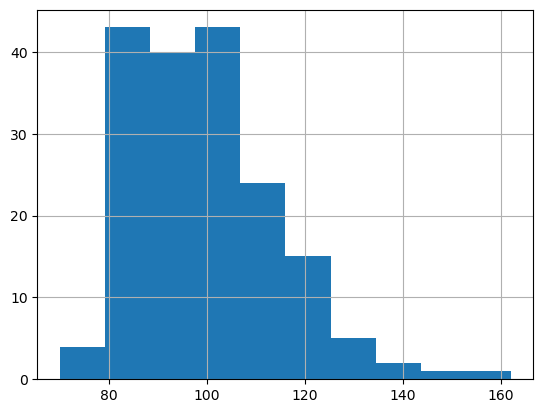

In [88]:
df['magnesium'].hist()

<Axes: >

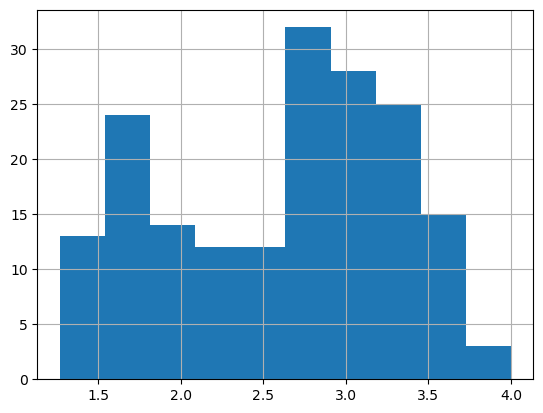

In [89]:
df['od280/od315_of_diluted_wines'].hist()

### Curtósis

Otra medida que se utiliza para describir la forma de la distribución es la **kurtósis** o **curtósis**. Esta utiliza el **momento central estandarizado de orden 4** para detectar valores extremos. En presencia de valores extremos, la forma de la distribución parece más puntiaguda; por esto la kurtósis se conoce como una medida del apuntalamiento de la distribución.

Dada una muestra $x1,x2,...,xn$ la curtósis se calcula como:

**cuarto momento central:**

$$ \mu_4 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^4 $$

La curtosis se define como:

$$ \text{Curtosis} = \gamma_2 = \frac{\mu_4}{\sigma^4} $$

Donde:
- $\mu_4$ es el cuarto momento central.
- $\sigma$ es la desviación estándar.

$$ \gamma_2 = \frac{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^4}{\left(\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2\right)^2} $$

Donde:
- $x_i$ son los valores de los datos.
- $\bar{x}$ es la media de los datos.
- $n$ es el número total de datos.
  
> **Curtosis** cercana a **3** indica una distribución normal (mesocúrtica).

> **Curtosis mayor** a **3**: leptocúrtica (pico alto y colas largas).

> **Curtosis menor** a **3**: platicúrtica (pico bajo y colas cortas).


In [90]:
# Distribución mesocúrtica (normal)
np.random.seed(0)
mesocurtica = np.random.normal(loc=0, scale=1, size=1000)
media_meso = np.mean(mesocurtica)
mediana_meso = np.median(mesocurtica)

# Distribución leptocúrtica (Laplace: picos altos y colas largas)
leptocurtica = np.random.laplace(loc=0, scale=0.5, size=1000)
media_lepto = np.mean(leptocurtica)
mediana_lepto = np.median(leptocurtica)

# Distribución platicúrtica (Uniforme: picos bajos y colas cortas)
platicurtica = np.random.uniform(low=-2, high=2, size=1000)
media_plati = np.mean(platicurtica)
mediana_plati = np.median(platicurtica)


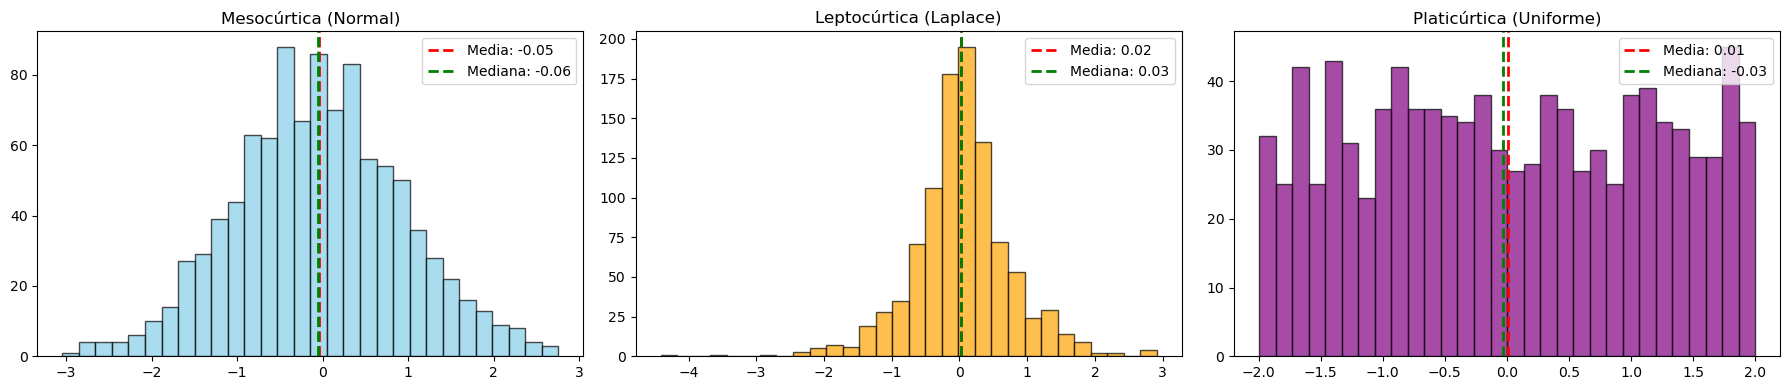

In [91]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Mesocúrtica
axs[0].hist(mesocurtica, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axs[0].axvline(media_meso, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_meso:.2f}')
axs[0].axvline(mediana_meso, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana_meso:.2f}')
axs[0].set_title('Mesocúrtica (Normal)')
axs[0].legend()

# Leptocúrtica
axs[1].hist(leptocurtica, bins=30, color='orange', edgecolor='black', alpha=0.7)
axs[1].axvline(media_lepto, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_lepto:.2f}')
axs[1].axvline(mediana_lepto, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana_lepto:.2f}')
axs[1].set_title('Leptocúrtica (Laplace)')
axs[1].legend()

# Platicúrtica
axs[2].hist(platicurtica, bins=30, color='purple', edgecolor='black', alpha=0.7)
axs[2].axvline(media_plati, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_plati:.2f}')
axs[2].axvline(mediana_plati, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana_plati:.2f}')
axs[2].set_title('Platicúrtica (Uniforme)')
axs[2].legend()

plt.tight_layout()
plt.show()

In [92]:
#En python podemos calcular la Curtósis con el método kurt
df['alcohol'].kurt()

-0.8524995684849164

In [93]:
df.kurt()

alcohol                        -0.852500
malic_acid                      0.299207
ash                             1.143978
alcalinity_of_ash               0.487942
magnesium                       2.104991
total_phenols                  -0.835627
flavanoids                     -0.880382
nonflavanoid_phenols           -0.637191
proanthocyanins                 0.554649
color_intensity                 0.381522
hue                            -0.344096
od280/od315_of_diluted_wines   -1.086435
proline                        -0.248403
dtype: float64

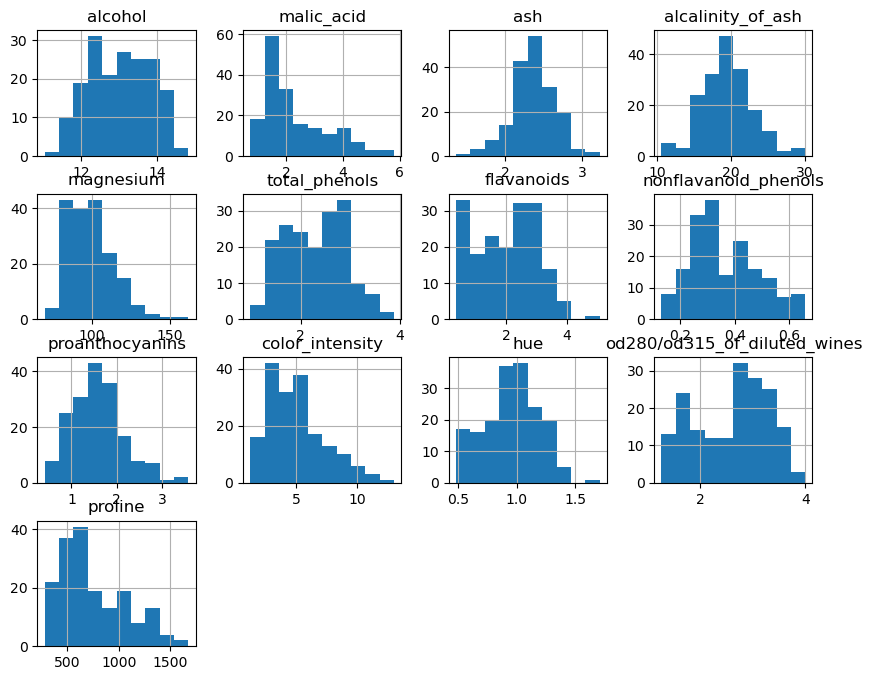

In [94]:
df.hist(figsize=(10,8));

Los datos reales son más complejos que la teoría, incluso estos que son batante sencillos. Se recomienda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma, un diagrama de cajas, un polígono de frecuencias, etc.